# Nakar and Piran Test

The idea behind the test is to equate the the inverse square law and the Amati relation to eliminate $E_{iso}$ and then solve for the $E_{pk}/S_{bolo}$ ratio. This ratio is said to separate all the observable terms (left side of equation) from the redshift dependent terms and constants (right side of the equation). 

\begin{equation}
\frac{E_{pk}^{c}}{S_{bolo}} = \frac{4 \pi D_L^2}{A (1+z)^{c+1}}
\end{equation}

The left side contains the observed peak energy and the bolometric fluence. Notice they consider the bolometric fluence to be independent of $z$, which is not true. However, the difference between the observed fluence and bolometric (rest frame) fluence is so small that the differences on the plot of $E_{pk}$ verses $S_{bolo}$ are negligibly small. 

From this equation, as distance to the object increases, $D_L$ rises and $(1+z)^{-(c+1)}$ decreases, thus revealing a maximum redshift.

```


```
## The Inverse Square Law is given by:

\begin{equation}
E_{iso} = 4 \pi D_L^2 \frac{S_{bolo}}{1+z} 
\end{equation}

#### Solve it for $S_{bolo}$
\begin{equation}
S_{bolo} = \frac{E_{iso} (1+z)}{4 \pi D_L^2}
\end{equation}

```

```
## Amati Relation

There are many published versions:

1) $\displaystyle{{ \ \ \log_{10}(E_{iso}) = 47.93 + 2.04 \log_{10}(E_{pk}(1+z)) \ \ }}$ 
**or**
$\displaystyle{{ \ \ E_{\gamma} = 10^{47.93} [E_{pk}(1+z)]^{2.04} }}$ 



### Plug the Amati Relation (in power form) into the Inverse Square Law for $E_{iso}$

\begin{equation}
S_{bolo} = \frac{E_{iso} (1+z)}{4 \pi D_L^2}
\end{equation}


\begin{equation}
S_{bolo} = \frac{10^{47.93} E_{pk}^{2.04} (1+z)^{2.04} (1+z)}{4 \pi D_L^2}
\end{equation}

$(1+z)^{2.04} (1+z) = (1+z)^{3.04}$

\begin{equation}
S_{bolo} = \frac{10^{47.93} E_{pk}^{2.04} (1+z)^{3.04}}{4 \pi D_L^2}
\end{equation}

### Solve for $\frac{E_{pk}^{2.04}}{S_{bolo}}$

\begin{equation}
\frac{E_{pk}^{2.04}}{S_{bolo}} = \frac{4 \pi D_L^2}{A (1+z)^{3.04}}
\end{equation}

where $A = 10^{47.93} = 8.511\times10^{47}$

## Generic Version of the Ratio so that any version can be used.

\begin{equation}
\frac{E_{pk}^{c}}{S_{bolo}} = \frac{4 \pi D_L^2}{A (1+z)^{c+1}}
\end{equation}

where $A=10^{\text{y-intercept}}$ and $c=\text{slope}$ of the relation. 

In **linearized form** these constants are derived from:

$\displaystyle{{ \log_{10}(E_{\gamma}) = \ \text{y-intercept} \ + \ \text{slope} \ \log_{10}(E_{pk}(1+z)) \ \ }}$ 

or in **power form**:

$\displaystyle{{E_{\gamma} = 10^{\text{y-intercept}} [E_{pk}(1+z)]^{\text{slope}} \ \ =  \ \ A [E_{pk}(1+z)]^{\text{slope}}}}$ 

In [1]:
import sys
sys.path.insert(1, '/Users/kimzoldak/Github/')  # import at runtime


import numpy as np
from numpy import pi
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from grbTools.cosmo.lumdist import LumDist

# Vectorize the LumDist function so that we can pass many redshifts to it at once. 
Lum_Dist = np.vectorize(LumDist)

In [2]:
def epeak_sbolo_ratio(redshift, lumdistance, exponent, amplitude):
    z = redshift
    DL = lumdistance
    c = exponent
    A = amplitude
    ratio = (4.*pi*(DL**2))/(A*(1.+z)**(c+1.))
    return ratio

In [3]:
def epeak_sbolo_ratio_left(sbolometric, epeak, exponent):
    c = exponent
    k = epeak
    sb = sbolometric
    return (k**c)/sb

In [4]:
def find_relation_max(redshifts, data):
    df = pd.DataFrame(list(zip(redshifts, data)), columns=['x', 'y'])
    redshiftMax = float(df[df['y'] == df.y.max()]['x'])
    print('Max redshift and max Epk/Sbolo ratio')
    print('%.3f  %.4E'%(redshiftMax, df.y.max()))
    return redshiftMax, df.y.max()

In [5]:
# dummy redshifts
redshifts = np.linspace(0.01, 20, 400)

# Data

In [6]:
direc = '/Users/kimzoldak/Github/GRB_Hubble_Diagram/data/'
df1 = pd.read_csv(direc+'band_results_for_sbolo_study.txt', sep='\t')


direc = '/Users/kimzoldak/Github/GRB_Hubble_Diagram/data/'
df2 = pd.read_csv(direc+'Schaefer2007_table4.txt', sep='\t')

#df2.loc[:, ['GRB', 'z', 'sbolo', 'epeak']]

df2 = df2.loc[:, ['GRB', 'z', 'sbolo', 'epeak']]
df2.dropna(inplace=True)

df1.shape, df2.shape

((35, 17), (27, 4))

# Collazzi et al paper:

In [7]:
cosmo_constants = {'hubble_constant': 74.0,
                     'matter_density': 0.3} 
lumdistances = Lum_Dist(redshift=redshifts, cosmoconstants=cosmo_constants)

AR_C = epeak_sbolo_ratio(redshift=redshifts, 
                  lumdistance=lumdistances, 
                  exponent=2.04, 
                  amplitude=9.2E47) 

find_relation_max(redshifts=redshifts, data=AR_C)

Max redshift and max Epk/Sbolo ratio
3.617  1.1252E+09


(3.6172180451127813, 1125217231.2748723)

Max redshift and max Epk/Sbolo ratio
3.617  1.1252E+09


<Figure size 432x288 with 0 Axes>

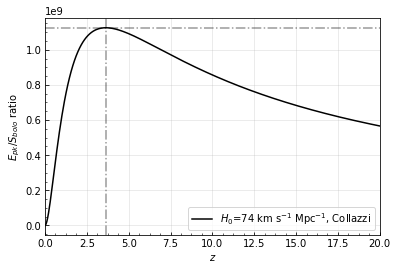

In [8]:
plt.clf()
plt.figure(figsize=(6,4))
plt.grid(alpha=0.3)

# H0 = 74  With Collazzi et al Amplitude
AR_C_max = find_relation_max(redshifts=redshifts, data=AR_C)

plt.plot(redshifts, AR_C, color='k', label='$H_0$=74 km s$^{-1}$ Mpc$^{-1}$, Collazzi')
plt.axvline(AR_C_max[0], 0, 1, ls='-.', color='k', alpha=0.4)  # max redshift
plt.axhline(AR_C_max[1], 0, 1, ls='-.', color='k', alpha=0.4)  # max ratio

plt.xlim(0, 20)
plt.minorticks_on()
plt.xlabel(r'$z$')
plt.ylabel(r'$E_{pk}/S_{bolo}$ ratio')
plt.legend(loc=0)
plt.show()

Max redshift and max Epk/Sbolo ratio
3.617  1.1252E+09


<Figure size 432x288 with 0 Axes>

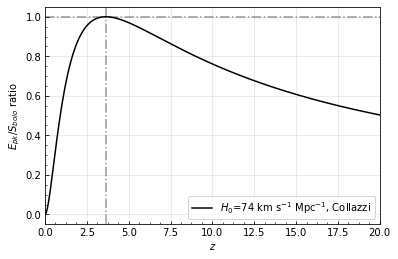

In [9]:
# Normalized Plot

plt.clf()
plt.figure(figsize=(6,4))
plt.grid(alpha=0.3)

# H0 = 74  With Collazzi et al Amplitude
AR_C_max = find_relation_max(redshifts=redshifts, data=AR_C)

plt.plot(redshifts, AR_C/AR_C_max[1], color='k', label='$H_0$=74 km s$^{-1}$ Mpc$^{-1}$, Collazzi')
plt.axvline(AR_C_max[0], 0, 1, ls='-.', color='k', alpha=0.4)  # max redshift
plt.axhline(AR_C_max[1]/AR_C_max[1], 0, 1, ls='-.', color='k', alpha=0.4)  # max ratio

plt.xlim(0, 20)
plt.minorticks_on()
plt.xlabel(r'$z$')
plt.ylabel(r'$E_{pk}/S_{bolo}$ ratio')
plt.legend(loc=0)
plt.show()

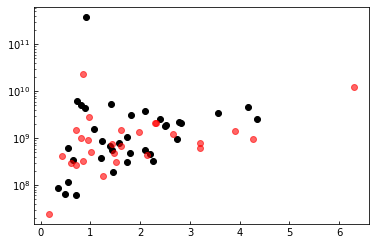

In [10]:
plt.plot(df1['z'], (df1['epeak']**2.04)/df1['flue_1k_10M_obsv'], 'o', color='k')
plt.plot(df2['z'], (df2['epeak']**2.04)/df2['sbolo'], 'o', color='red', alpha=0.6)

plt.yscale('log')

Max redshift and max Epk/Sbolo ratio
3.617  1.1252E+09


<Figure size 432x288 with 0 Axes>

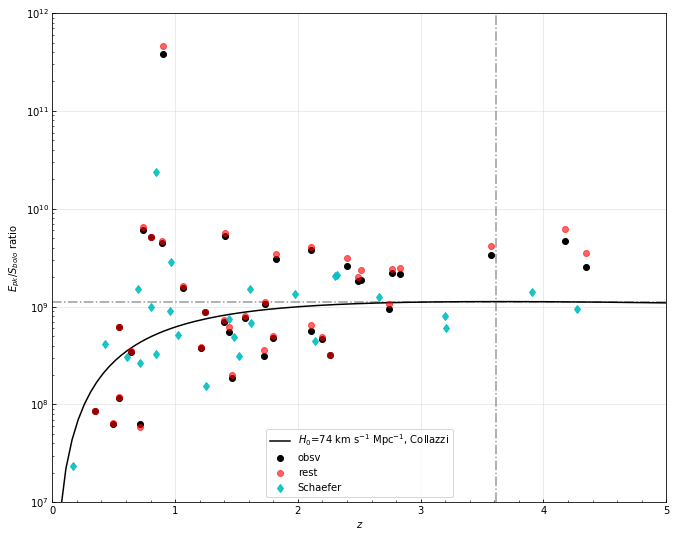

In [11]:
plt.clf()

plt.figure(figsize=(11,9))
plt.grid(alpha=0.3)


# H0 = 74  With Collazzi et al Amplitude
AR_C_max = find_relation_max(redshifts=redshifts, data=AR_C)

plt.plot(redshifts, AR_C, color='k', label='$H_0$=74 km s$^{-1}$ Mpc$^{-1}$, Collazzi')
plt.axvline(AR_C_max[0], 0, 1, ls='-.', color='k', alpha=0.4)  # max redshift
plt.axhline(AR_C_max[1], 0, 1, ls='-.', color='k', alpha=0.4)  # max ratio

plt.plot(df1['z'], (df1['epeak']**2.04)/df1['flue_1k_10M_obsv'], 'o', color='k', label='obsv')
plt.plot(df1['z'], (df1['epeak']**2.04)/df1['flue_1k_10M_rest'], 'o', color='red', alpha=0.6, label='rest')
plt.plot(df2['z'], (df2['epeak']**2.04)/df2['sbolo'], 'd', color='c', alpha=0.9, label='Schaefer')


plt.xlim(0, 5)
plt.ylim(1E7, 1E12)
plt.minorticks_on()

plt.yscale('log')

plt.xlabel(r'$z$')
plt.ylabel(r'$E_{pk}/S_{bolo}$ ratio')
plt.legend(loc=0)
plt.show()

# Different Concordance Cosmologies (different $H_0$)

In [12]:
cosmo_constants = {'hubble_constant': 67.8,
                     'matter_density': 0.308} 
lumdistances = Lum_Dist(redshift=redshifts, cosmoconstants=cosmo_constants)

In [13]:
cosmo_constants2 = {'hubble_constant': 74.0,
                     'matter_density': 0.3}
lumdistances2 = Lum_Dist(redshift=redshifts, cosmoconstants=cosmo_constants2)

In [14]:
AR_1 = epeak_sbolo_ratio(redshift=redshifts, 
                  lumdistance=lumdistances, 
                  exponent=2.04, 
                  amplitude=8.511E47)
 
AR_2 = epeak_sbolo_ratio(redshift=redshifts, 
                  lumdistance=lumdistances2, 
                  exponent=2.04, 
                  amplitude=8.511E47)

In [15]:
find_relation_max(redshifts=redshifts, data=AR_1)

Max redshift and max Epk/Sbolo ratio
3.617  1.4255E+09


(3.6172180451127813, 1425478248.1453638)

In [16]:
find_relation_max(redshifts=redshifts, data=AR_2)

Max redshift and max Epk/Sbolo ratio
3.617  1.2163E+09


(3.6172180451127813, 1216308133.9124455)

In [17]:
out1 = find_relation_max(redshifts=redshifts, data=AR_1)
out2 = find_relation_max(redshifts=redshifts, data=AR_2)

np.diff([out1[0], out2[0]]), np.diff([out1[1], out2[1]])

Max redshift and max Epk/Sbolo ratio
3.617  1.4255E+09
Max redshift and max Epk/Sbolo ratio
3.617  1.2163E+09


(array([0.]), array([-2.09170114e+08]))

The function peaks at z=3.617, regardless of $H_0$ used in the concordance cosmology. The corresponding epk/sbolo ratio, however, highly depends on $H_0$ and at the max redshift the ratio is 1.4489E+09 ($H_0=67.8$, $\Omega_M=0.3$) and 1.2163E+09 ($H_0=74$, $\Omega_M=0.3$), which is a difference of 2.32622728e+08 in the ratio for just the difference in the Hubble Constant. 

If we use the cosmology constants we adopt ($H_0=67.8$, $\Omega_M=0.308$), then the ratio is 1.4255E+09 at z=3.617, the max redshift. The maximum redshift (peak in the curve) that the Amati relation's Epk/Sbolo returns does not vary when we vary the value of $H_0$. Significantly changing $\Omega_M$ however will change zmax.  

The Amati relation used in the above analysis was $A=10^{47.93}$ and $c=2.04$. 



In [18]:
cosmo_constants = {'hubble_constant': 74.0,
                     'matter_density': 0.3} 
lumdistances = Lum_Dist(redshift=redshifts, cosmoconstants=cosmo_constants)

AR_0 = epeak_sbolo_ratio(redshift=redshifts, 
                  lumdistance=lumdistances, 
                  exponent=2.04, 
                  amplitude=10**47.93)  # 8.511E47



cosmo_constants = {'hubble_constant': 70.0,
                     'matter_density': 0.3} 
lumdistances = Lum_Dist(redshift=redshifts, cosmoconstants=cosmo_constants)

AR_1 = epeak_sbolo_ratio(redshift=redshifts, 
                  lumdistance=lumdistances, 
                  exponent=2.04, 
                  amplitude=10**47.93)  # 8.511E47


cosmo_constants = {'hubble_constant': 65.0,
                     'matter_density': 0.3} 
lumdistances = Lum_Dist(redshift=redshifts, cosmoconstants=cosmo_constants)

AR_2 = epeak_sbolo_ratio(redshift=redshifts, 
                  lumdistance=lumdistances, 
                  exponent=2.04, 
                  amplitude=10**47.93)

In [19]:
AR_C_max = find_relation_max(redshifts=redshifts, data=AR_C)

Max redshift and max Epk/Sbolo ratio
3.617  1.1252E+09


In [20]:
AR_0_max = find_relation_max(redshifts=redshifts, data=AR_0)
#print('%.3f  %.4E'%(AR_0_max[0], AR_0_max[1]))

Max redshift and max Epk/Sbolo ratio
3.617  1.2163E+09


In [21]:
AR_1_max = find_relation_max(redshifts=redshifts, data=AR_1)
#print(AR_1_max)

Max redshift and max Epk/Sbolo ratio
3.617  1.3592E+09


In [22]:
AR_2_max = find_relation_max(redshifts=redshifts, data=AR_2)
#print(AR_2_max)

Max redshift and max Epk/Sbolo ratio
3.617  1.5764E+09


In [23]:
np.diff([AR_1_max[1], AR_2_max[1]])

array([2.17154394e+08])

In [24]:
AR_2_max[1]-AR_1_max[1]

217154393.51994634

If using the cosmology Amati did to derive his 2006 duration ($H_0$=65), you get a ratio that is larger than when the $H_0$=70 cosmology is used by 2.17154394e+08. 

Max redshift and max Epk/Sbolo ratio
3.617  1.1252E+09
Max redshift and max Epk/Sbolo ratio
3.617  1.2163E+09
Max redshift and max Epk/Sbolo ratio
3.617  1.3592E+09
Max redshift and max Epk/Sbolo ratio
3.617  1.5764E+09


<Figure size 432x288 with 0 Axes>

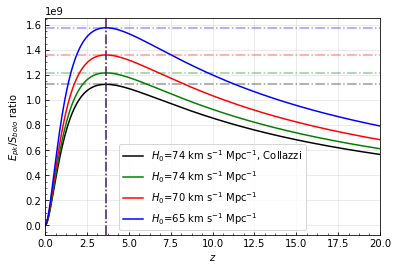

In [25]:
plt.clf()

plt.figure(figsize=(6,4))
plt.grid(alpha=0.3)


# H0 = 74  With Collazzi et al Amplitude
AR_C_max = find_relation_max(redshifts=redshifts, data=AR_C)
plt.plot(redshifts, AR_C, color='k', label='$H_0$=74 km s$^{-1}$ Mpc$^{-1}$, Collazzi')
plt.axvline(AR_C_max[0], 0, 1, ls='-.', color='k', alpha=0.4)  # max redshift
plt.axhline(AR_C_max[1], 0, 1, ls='-.', color='k', alpha=0.4)  # max ratio


# H0 = 74
AR_0_max = find_relation_max(redshifts=redshifts, data=AR_0)
plt.plot(redshifts, AR_0, color='green', label='$H_0$=74 km s$^{-1}$ Mpc$^{-1}$')
plt.axvline(AR_0_max[0], 0, 1, ls='-.', color='green', alpha=0.4)  # max redshift
plt.axhline(AR_0_max[1], 0, 1, ls='-.', color='green', alpha=0.4)  # max ratio


# H0 = 70
AR_1_max = find_relation_max(redshifts=redshifts, data=AR_1)
plt.plot(redshifts, AR_1, color='red', label='$H_0$=70 km s$^{-1}$ Mpc$^{-1}$')
plt.axvline(AR_1_max[0], 0, 1, ls='-.', color='red', alpha=0.4)  # max redshift
plt.axhline(AR_1_max[1], 0, 1, ls='-.', color='red', alpha=0.4)  # max ratio

# H0 = 65
AR_2_max = find_relation_max(redshifts=redshifts, data=AR_2)
plt.plot(redshifts, AR_2, color='blue', label='$H_0$=65 km s$^{-1}$ Mpc$^{-1}$')
plt.axvline(AR_2_max[0], 0, 1, ls='-.', color='blue', alpha=0.4)  # max redshift
plt.axhline(AR_2_max[1], 0, 1, ls='-.', color='blue', alpha=0.4)  # max ratio


plt.xlim(0, 20)
plt.minorticks_on()
plt.xlabel(r'$z$')
plt.ylabel(r'$E_{pk}/S_{bolo}$ ratio')
plt.legend(loc=0)
plt.show()

Max redshift and max Epk/Sbolo ratio
3.617  1.1252E+09
Max redshift and max Epk/Sbolo ratio
3.617  1.2163E+09
Max redshift and max Epk/Sbolo ratio
3.617  1.3592E+09
Max redshift and max Epk/Sbolo ratio
3.617  1.5764E+09


<Figure size 432x288 with 0 Axes>

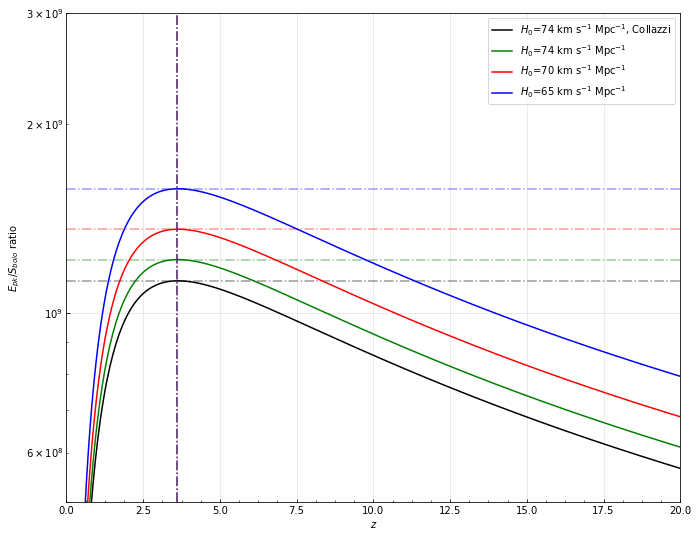

In [26]:
plt.clf()

plt.figure(figsize=(11,9))
plt.grid(alpha=0.3)


# H0 = 74  With Collazzi et al Amplitude
AR_C_max = find_relation_max(redshifts=redshifts, data=AR_C)
plt.plot(redshifts, AR_C, color='k', label='$H_0$=74 km s$^{-1}$ Mpc$^{-1}$, Collazzi')
plt.axvline(AR_C_max[0], 0, 1, ls='-.', color='k', alpha=0.4)  # max redshift
plt.axhline(AR_C_max[1], 0, 1, ls='-.', color='k', alpha=0.4)  # max ratio


# H0 = 74
AR_0_max = find_relation_max(redshifts=redshifts, data=AR_0)
plt.plot(redshifts, AR_0, color='green', label='$H_0$=74 km s$^{-1}$ Mpc$^{-1}$')
plt.axvline(AR_0_max[0], 0, 1, ls='-.', color='green', alpha=0.4)  # max redshift
plt.axhline(AR_0_max[1], 0, 1, ls='-.', color='green', alpha=0.4)  # max ratio


# H0 = 70
AR_1_max = find_relation_max(redshifts=redshifts, data=AR_1)
plt.plot(redshifts, AR_1, color='red', label='$H_0$=70 km s$^{-1}$ Mpc$^{-1}$')
plt.axvline(AR_1_max[0], 0, 1, ls='-.', color='red', alpha=0.4)  # max redshift
plt.axhline(AR_1_max[1], 0, 1, ls='-.', color='red', alpha=0.4)  # max ratio

# H0 = 65
AR_2_max = find_relation_max(redshifts=redshifts, data=AR_2)
plt.plot(redshifts, AR_2, color='blue', label='$H_0$=65 km s$^{-1}$ Mpc$^{-1}$')
plt.axvline(AR_2_max[0], 0, 1, ls='-.', color='blue', alpha=0.4)  # max redshift
plt.axhline(AR_2_max[1], 0, 1, ls='-.', color='blue', alpha=0.4)  # max ratio

plt.xlim(0, 20)
plt.ylim(5E8, 3E9)
plt.minorticks_on()
plt.yscale('log')
plt.xlabel(r'$z$')
plt.ylabel(r'$E_{pk}/S_{bolo}$ ratio')
plt.legend(loc=0)
plt.show()

Max redshift and max Epk/Sbolo ratio
3.617  1.1252E+09
Max redshift and max Epk/Sbolo ratio
3.617  1.2163E+09
Max redshift and max Epk/Sbolo ratio
3.617  1.3592E+09
Max redshift and max Epk/Sbolo ratio
3.617  1.5764E+09


<Figure size 432x288 with 0 Axes>

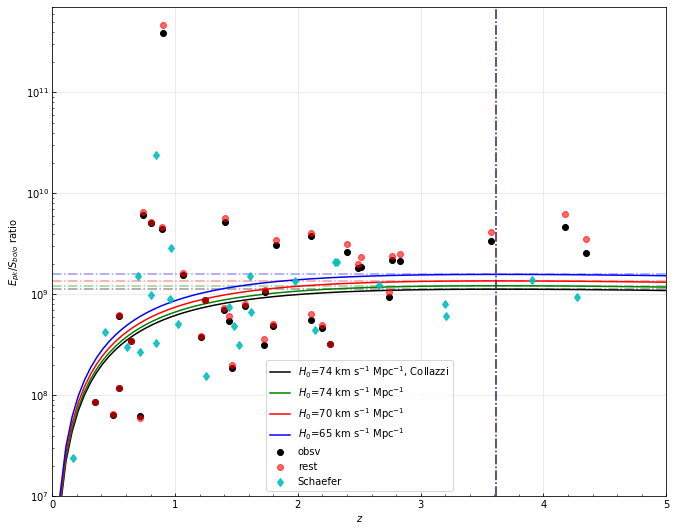

In [27]:
plt.clf()

plt.figure(figsize=(11,9))
plt.grid(alpha=0.3)


# H0 = 74  With Collazzi et al Amplitude
AR_C_max = find_relation_max(redshifts=redshifts, data=AR_C)
plt.plot(redshifts, AR_C, color='k', label='$H_0$=74 km s$^{-1}$ Mpc$^{-1}$, Collazzi')
plt.axvline(AR_C_max[0], 0, 1, ls='-.', color='k', alpha=0.4)  # max redshift
plt.axhline(AR_C_max[1], 0, 1, ls='-.', color='k', alpha=0.4)  # max ratio

# H0 = 74
AR_0_max = find_relation_max(redshifts=redshifts, data=AR_0)
plt.plot(redshifts, AR_0, color='green', label='$H_0$=74 km s$^{-1}$ Mpc$^{-1}$')
plt.axvline(AR_0_max[0], 0, 1, ls='-.', color='green', alpha=0.4)  # max redshift
plt.axhline(AR_0_max[1], 0, 1, ls='-.', color='green', alpha=0.4)  # max ratio


# H0 = 70
AR_1_max = find_relation_max(redshifts=redshifts, data=AR_1)
plt.plot(redshifts, AR_1, color='red', label='$H_0$=70 km s$^{-1}$ Mpc$^{-1}$')
plt.axvline(AR_1_max[0], 0, 1, ls='-.', color='red', alpha=0.4)  # max redshift
plt.axhline(AR_1_max[1], 0, 1, ls='-.', color='red', alpha=0.4)  # max ratio

# H0 = 65
AR_2_max = find_relation_max(redshifts=redshifts, data=AR_2)
plt.plot(redshifts, AR_2, color='blue', label='$H_0$=65 km s$^{-1}$ Mpc$^{-1}$')
plt.axvline(AR_2_max[0], 0, 1, ls='-.', color='blue', alpha=0.4)  # max redshift
plt.axhline(AR_2_max[1], 0, 1, ls='-.', color='blue', alpha=0.4)  # max ratio

plt.plot(df1['z'], (df1['epeak']**2.04)/df1['flue_1k_10M_obsv'], 'o', color='k', label='obsv')
plt.plot(df1['z'], (df1['epeak']**2.04)/df1['flue_1k_10M_rest'], 'o', color='red', alpha=0.6, label='rest')
plt.plot(df2['z'], (df2['epeak']**2.04)/df2['sbolo'], 'd', color='c', alpha=0.9, label='Schaefer')


plt.xlim(0, 5)
plt.ylim(1E7, 7E11)
plt.minorticks_on()

plt.yscale('log')

plt.xlabel(r'$z$')
plt.ylabel(r'$E_{pk}/S_{bolo}$ ratio')
plt.legend(loc=0)
plt.show()

Max redshift and max Epk/Sbolo ratio
3.617  1.1252E+09
Max redshift and max Epk/Sbolo ratio
3.617  1.2163E+09
Max redshift and max Epk/Sbolo ratio
3.617  1.3592E+09
Max redshift and max Epk/Sbolo ratio
3.617  1.5764E+09


<Figure size 432x288 with 0 Axes>

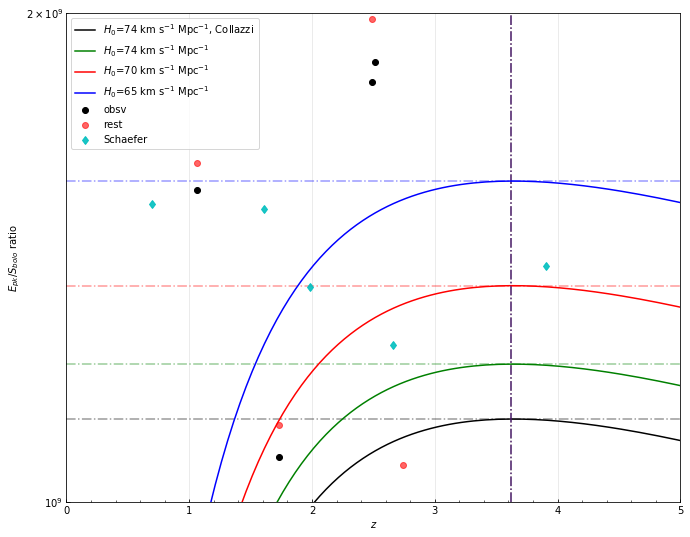

In [29]:
plt.clf()

plt.figure(figsize=(11,9))
plt.grid(alpha=0.3)


# H0 = 74  With Collazzi et al Amplitude
AR_C_max = find_relation_max(redshifts=redshifts, data=AR_C)
plt.plot(redshifts, AR_C, color='k', label='$H_0$=74 km s$^{-1}$ Mpc$^{-1}$, Collazzi')
plt.axvline(AR_C_max[0], 0, 1, ls='-.', color='k', alpha=0.4)  # max redshift
plt.axhline(AR_C_max[1], 0, 1, ls='-.', color='k', alpha=0.4)  # max ratio

# H0 = 74
AR_0_max = find_relation_max(redshifts=redshifts, data=AR_0)
plt.plot(redshifts, AR_0, color='green', label='$H_0$=74 km s$^{-1}$ Mpc$^{-1}$')
plt.axvline(AR_0_max[0], 0, 1, ls='-.', color='green', alpha=0.4)  # max redshift
plt.axhline(AR_0_max[1], 0, 1, ls='-.', color='green', alpha=0.4)  # max ratio


# H0 = 70
AR_1_max = find_relation_max(redshifts=redshifts, data=AR_1)
plt.plot(redshifts, AR_1, color='red', label='$H_0$=70 km s$^{-1}$ Mpc$^{-1}$')
plt.axvline(AR_1_max[0], 0, 1, ls='-.', color='red', alpha=0.4)  # max redshift
plt.axhline(AR_1_max[1], 0, 1, ls='-.', color='red', alpha=0.4)  # max ratio

# H0 = 65
AR_2_max = find_relation_max(redshifts=redshifts, data=AR_2)
plt.plot(redshifts, AR_2, color='blue', label='$H_0$=65 km s$^{-1}$ Mpc$^{-1}$')
plt.axvline(AR_2_max[0], 0, 1, ls='-.', color='blue', alpha=0.4)  # max redshift
plt.axhline(AR_2_max[1], 0, 1, ls='-.', color='blue', alpha=0.4)  # max ratio



plt.plot(df1['z'], (df1['epeak']**2.04)/df1['flue_1k_10M_obsv'], 'o', color='k', label='obsv')
plt.plot(df1['z'], (df1['epeak']**2.04)/df1['flue_1k_10M_rest'], 'o', color='red', alpha=0.6, label='rest')
plt.plot(df2['z'], (df2['epeak']**2.04)/df2['sbolo'], 'd', color='c', alpha=0.9, label='Schaefer')


plt.xlim(0, 5)
plt.ylim(1E9, 2E9)
#plt.ylim(1E9, 1E10)
plt.minorticks_on()

plt.yscale('log')

plt.xlabel(r'$z$')
plt.ylabel(r'$E_{pk}/S_{bolo}$ ratio')
plt.legend(loc=0)
plt.show()

Four of Schaefer's data points lie totally above all the relations. Five reside between the black and the blue ratio lines. The rest lie below the black ratio line. 

In [30]:
ratio_cutoffs = [1.1252E+09, 1.2163E+09, 1.3592E+09, 1.5764E+09]

## Trying Different Amati Relations

## sources:
#### 1) Amati et al. (2002). 
12 GRBs with z. BeppoSAX(2-700 keV). Band fn. 1-10000 keV for Eiso, H0=65, OmegaM=0.3, OmegaL=0.7.  
$E_{pk} \propto E_{iso}^{0.52}$

#### 2) Amati et al. (2006)
41 GRBs/XRFs with z. Band fn. 1-10000 keV for Eiso, H0=65, OmegaM=0.3, OmegaL=0.7.

$E^*_{pk} = 77 E_{iso}^{0.57}$ which is also $\log_{10}(E^*_{pk}) = 1.8865 + 0.57 \log_{10}(E_{iso})$ (without accouting for sample variance). 

$E^*_{pk} = 95 E_{iso}^{0.49}$ which is also $\log_{10}(E^*_{pk}) = 1.9777 + 0.49 \log_{10}(E_{iso})$ (when accouting for sample variance). 

When I fit his data I get $\log_{10}(E^*_{pk}) = 1.995 + 0.4902  \log_{10}(E_{iso}/10^{52})$

Both round to $\log_{10}(E^*_{pk}) = 2.0 + 0.49  \log_{10}(E_{iso}/10^{52})$

My fit to the data with EpeakRest as the dependent variable and rearranging to solve for Eiso gives me:  $ \displaystyle{{ \log_{10}(E_{iso}) = 47.931 + 2.040  \log_{10}(E_{pk}(1+z)) }} $
Notice this is the equation that Collazzi et al uses. 






In [32]:
yints = [47.96, 47.93, 48.296, 48.434, 48.063, 48.517, 48.0]
slopes = [2.04, 2.04, 1.852, 1.821, 1.919, 1.802, 2.0]

In [33]:
cosmo_constants = {'hubble_constant': 70,
                     'matter_density': 0.3} 
lumdistances = Lum_Dist(redshift=redshifts, cosmoconstants=cosmo_constants)

for yint,slope in zip(yints,slopes):
    AR = epeak_sbolo_ratio(redshift=redshifts, 
                      lumdistance=lumdistances, 
                      exponent=slope, 
                      amplitude=10**yint)

    AR_max = find_relation_max(redshifts=redshifts, data=AR)


Max redshift and max Epk/Sbolo ratio
3.617  1.2685E+09
Max redshift and max Epk/Sbolo ratio
3.617  1.3592E+09
Max redshift and max Epk/Sbolo ratio
4.719  7.9567E+08
Max redshift and max Epk/Sbolo ratio
4.970  6.1164E+08
Max redshift and max Epk/Sbolo ratio
4.269  1.2139E+09
Max redshift and max Epk/Sbolo ratio
5.120  5.2281E+08
Max redshift and max Epk/Sbolo ratio
3.818  1.2311E+09


**The maximum redshift depends on the relation used.**

Max redshift and max Epk/Sbolo ratio
3.617  1.3303E+09
Max redshift and max Epk/Sbolo ratio
3.617  1.4254E+09
Max redshift and max Epk/Sbolo ratio
4.719  8.3367E+08
Max redshift and max Epk/Sbolo ratio
4.920  6.4076E+08
Max redshift and max Epk/Sbolo ratio
4.269  1.2723E+09
Max redshift and max Epk/Sbolo ratio
5.070  5.4764E+08
Max redshift and max Epk/Sbolo ratio
3.818  1.2908E+09


<Figure size 432x288 with 0 Axes>

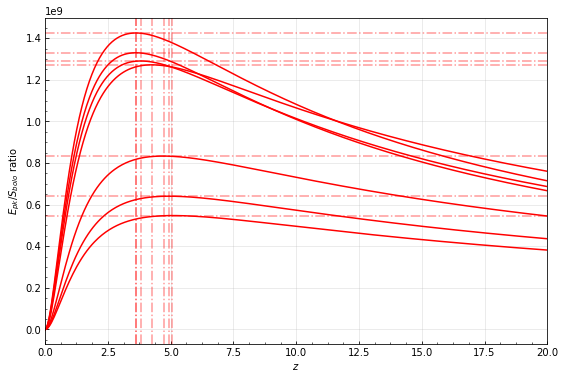

In [34]:
cosmo_constants = {'hubble_constant': 67.8,
                     'matter_density': 0.308} 
lumdistances = Lum_Dist(redshift=redshifts, cosmoconstants=cosmo_constants)


plt.clf()

plt.figure(figsize=(9,6))
plt.grid(alpha=0.3)

for yint,slope in zip(yints,slopes):
    AR = epeak_sbolo_ratio(redshift=redshifts, 
                      lumdistance=lumdistances, 
                      exponent=slope, 
                      amplitude=10**yint)
    
    plt.plot(redshifts, AR, color='red')
    AR_max = find_relation_max(redshifts=redshifts, data=AR)
    plt.axvline(AR_max[0], 0, 1, ls='-.', color='red', alpha=0.4)  # max redshift
    plt.axhline(AR_max[1], 0, 1, ls='-.', color='red', alpha=0.4)  # max ratio
plt.xlim(0, 20)
plt.minorticks_on()
plt.xlabel(r'$z$')
plt.ylabel(r'$E_{pk}/S_{bolo}$ ratio')
plt.show()

Max redshift and max Epk/Sbolo ratio
3.617  1.1351E+09
Max redshift and max Epk/Sbolo ratio
3.617  1.2163E+09
Max redshift and max Epk/Sbolo ratio
4.719  7.1198E+08
Max redshift and max Epk/Sbolo ratio
4.970  5.4730E+08
Max redshift and max Epk/Sbolo ratio
4.269  1.0862E+09
Max redshift and max Epk/Sbolo ratio
5.120  4.6781E+08
Max redshift and max Epk/Sbolo ratio
3.818  1.1016E+09


<Figure size 432x288 with 0 Axes>

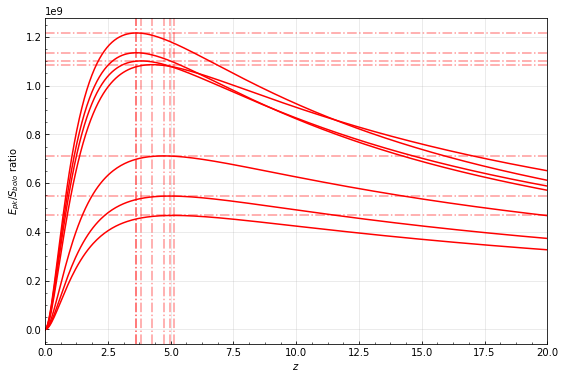

In [35]:
cosmo_constants = {'hubble_constant': 74,
                     'matter_density': 0.3} 
lumdistances = Lum_Dist(redshift=redshifts, cosmoconstants=cosmo_constants)


plt.clf()

plt.figure(figsize=(9,6))
plt.grid(alpha=0.3)

for yint,slope in zip(yints,slopes):
    AR = epeak_sbolo_ratio(redshift=redshifts, 
                      lumdistance=lumdistances, 
                      exponent=slope, 
                      amplitude=10**yint)
    
    plt.plot(redshifts, AR, color='red')
    AR_max = find_relation_max(redshifts=redshifts, data=AR)
    plt.axvline(AR_max[0], 0, 1, ls='-.', color='red', alpha=0.4)  # max redshift
    plt.axhline(AR_max[1], 0, 1, ls='-.', color='red', alpha=0.4)  # max ratio
plt.xlim(0, 20)
plt.minorticks_on()
plt.xlabel(r'$z$')
plt.ylabel(r'$E_{pk}/S_{bolo}$ ratio')
plt.show()